# Heart Disease Prediction using Decision Tree and Random Forest

# Project: Final Project - Decision Tree
Dataset: UCI Heart Disease (Cleveland) Dataset
Author: [Virakden - Hikaru - Hermon]
Description:
- This project implements a Decision Tree classifier to predict the
- presence of heart disease using the classic UCI Cleveland dataset.
- The workflow includes data loading, cleaning, exploratory analysis,
- model training, evaluation, visualization, and comparison with Random Forest.
- Extra tasks: try different split criteria and discuss feature importances.

# 1. Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.tree import export_graphviz

# 2. Import Dataset

In [6]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

In [7]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

df = heart_disease.data.original

In [8]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [9]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# 3. Data Preprocessing

In [10]:
#drop mising data
df = df.dropna(subset=['ca', 'thal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [11]:
# count number of each taget
df['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [12]:
# binarize the target column (0: No disease, 1: Disease)
df.loc[:, 'num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df['num'].value_counts()

num
0    160
1    137
Name: count, dtype: int64

## Visualize Data

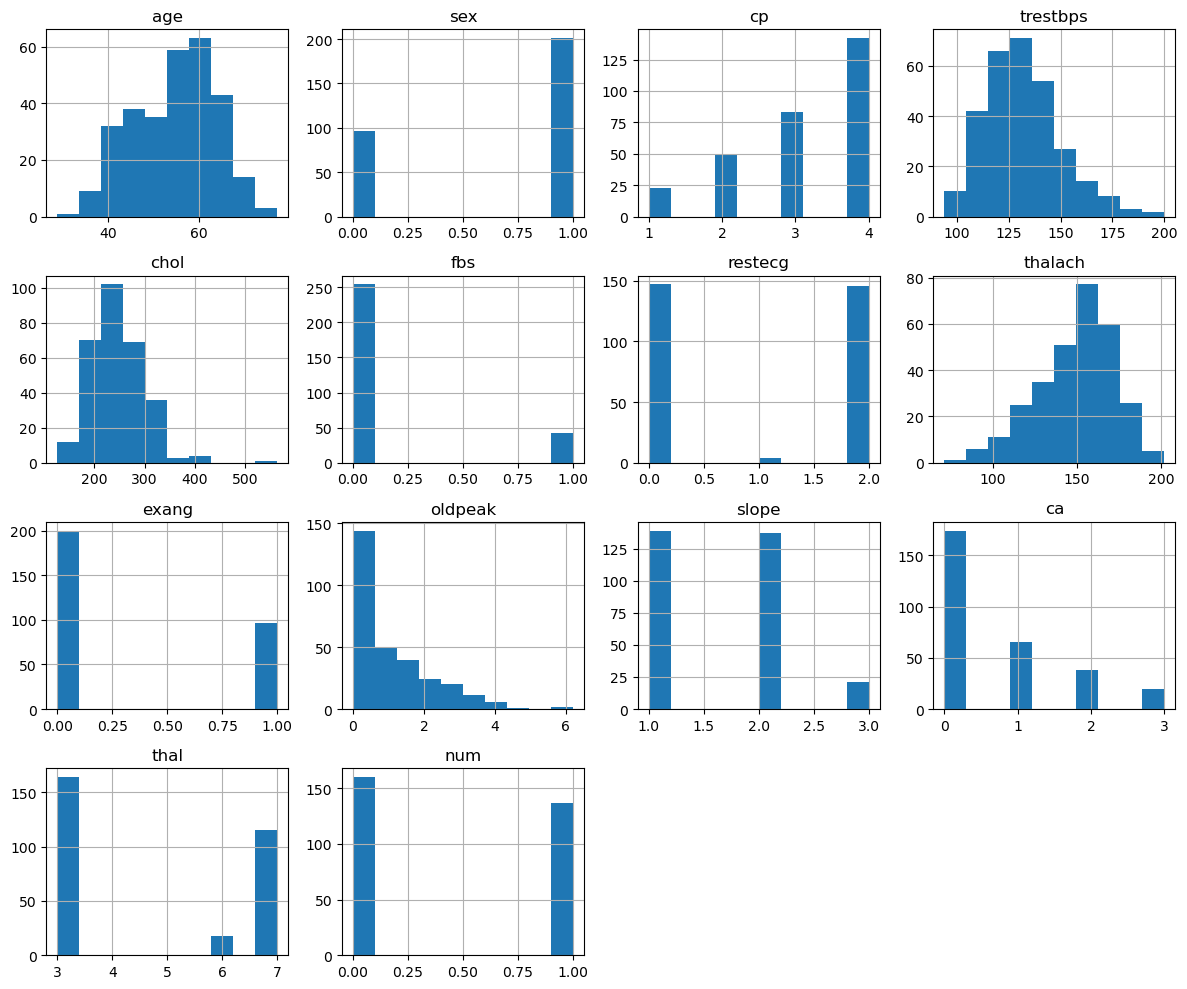

In [13]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Feature Preparation & Train-Test Split

In [14]:
# Separate features and target, split data
X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# 4. Decision Tree Model Training & Evaluation

## Function and Parameter

In [15]:
max_depth=None
random_state=42
viz_pathname = "viz/"
depth_str = str(max_depth) if max_depth is not None else "none"

In [16]:
# evaluation function

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
    # print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

In [17]:
def visualizeModel(model, folder): 
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=X.columns,
        class_names=['No Disease', 'Disease'],  # adjust based on your labels
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    graph = graphviz.Source(dot_data, format="png")
    # graph.render(viz_pathname + folder + "/max-depth-" + depth_str , format="png", cleanup=False)
    return graph

## Model with Gini Index Criterion

1.0
Decision Tree Accuracy: 0.7833333333333333
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



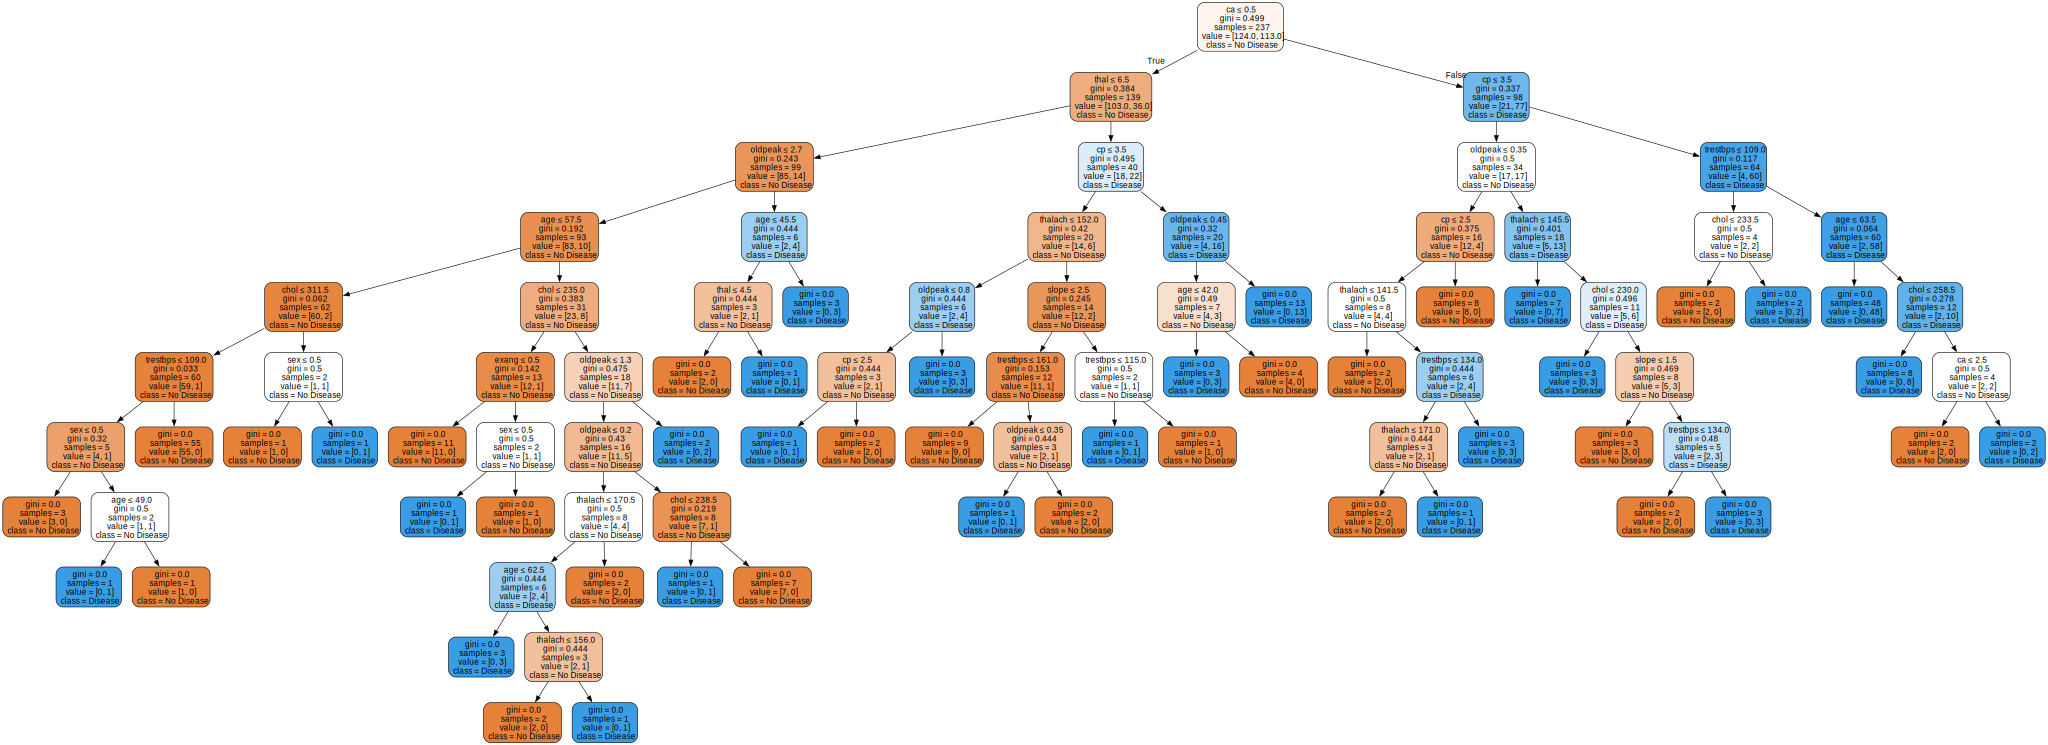

In [18]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=random_state)
dt_gini.fit(X_train, y_train)

print(dt_gini.score(X_train, y_train))

evaluate(dt_gini, X_test, y_test)

visualizeModel(dt_gini, "dt_gini")


## Model with Information Gain Criterion

1.0
Decision Tree Accuracy: 0.7833333333333333
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.70      0.79      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



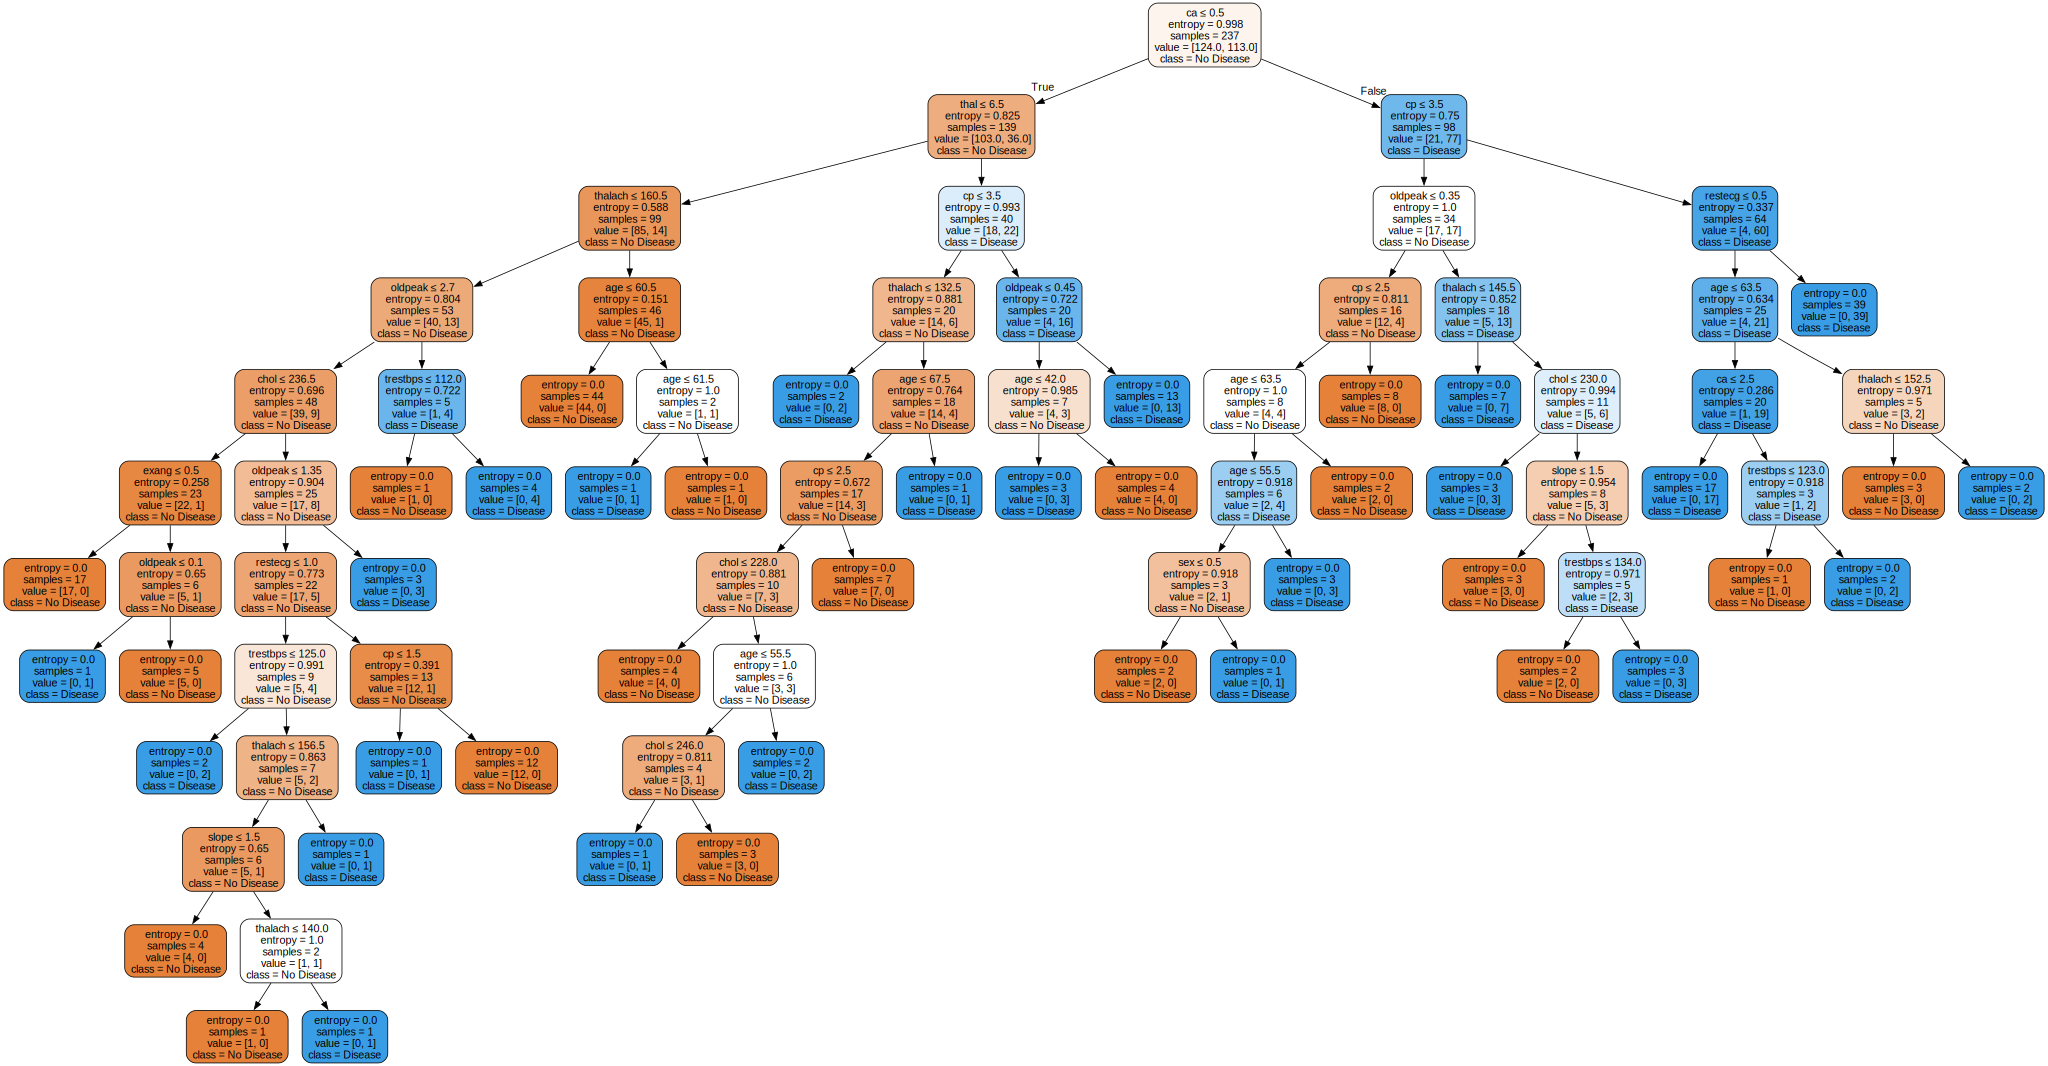

In [19]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=random_state)
dt_entropy.fit(X_train, y_train)
print(dt_entropy.score(X_train, y_train))
evaluate(dt_entropy, X_test, y_test)

visualizeModel(dt_entropy, "dt_entropy")

In [20]:
# train models
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

evaluate(rf, X_test, y_test)

Decision Tree Accuracy: 0.8666666666666667
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



# 5. Hyperparameter Tuning 

## Post-Pruning

In [21]:
def post_pruning(model, criterion, random_state):
    path = model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    cv_scores = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion=criterion, ccp_alpha=ccp_alpha, random_state=random_state)
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        cv_scores.append(np.mean(scores))

    best_alpha_index = np.argmax(cv_scores)
    best_ccp_alpha = ccp_alphas[best_alpha_index]

    best_pruned_model = DecisionTreeClassifier(criterion=criterion, ccp_alpha=best_ccp_alpha, random_state=random_state)
    best_pruned_model.fit(X_train, y_train)

    return {
        "model": best_pruned_model,
        "best_alpha": best_ccp_alpha,
        "cv_scores": cv_scores,
        "ccp_alphas": ccp_alphas
    }


### Gini Index Criterion

Best ccp_alpha: 0.013502109704641347
Decision Tree Accuracy: 0.8
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.71      0.83      0.77        24

    accuracy                           0.80        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



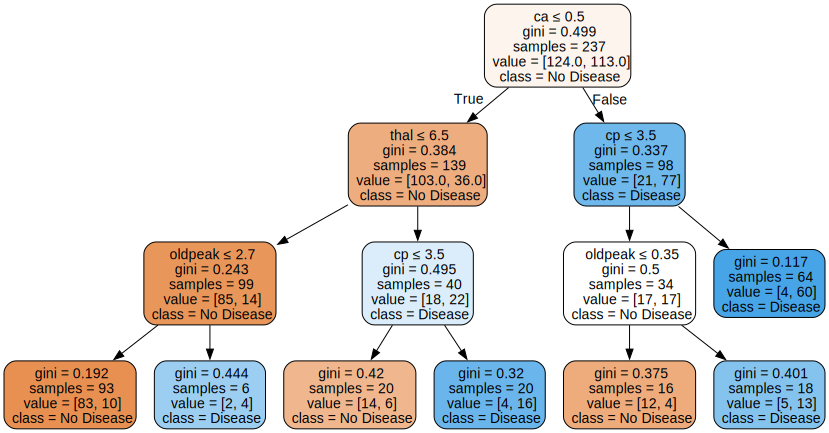

In [22]:
gini_post_pruning = post_pruning(dt_gini, "gini", random_state)
print("Best ccp_alpha:", gini_post_pruning["best_alpha"])
evaluate(gini_post_pruning["model"], X_test, y_test)
visualizeModel(gini_post_pruning["model"], "post_pruning_model_"+"gini")

### Information Gain Criterion

Best ccp_alpha: 0.03182263690087546
Decision Tree Accuracy: 0.8666666666666667
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



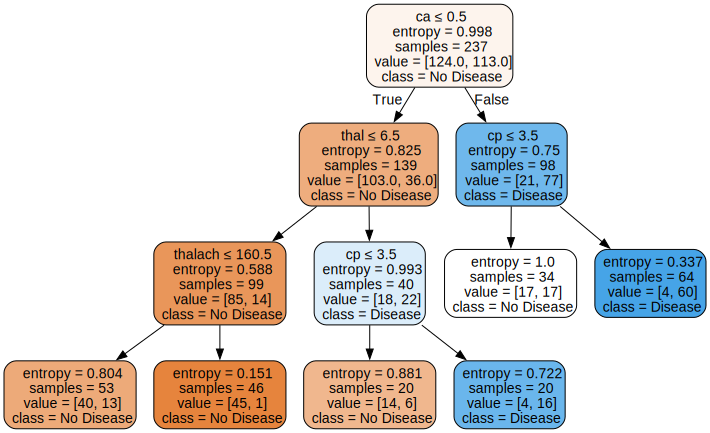

In [23]:
entropy_post_pruning = post_pruning(dt_entropy, "entropy", random_state)
print("Best ccp_alpha:", entropy_post_pruning["best_alpha"])
evaluate(entropy_post_pruning["model"], X_test, y_test)
visualizeModel(entropy_post_pruning["model"], "post_pruning_model_"+"entropy")

# 6. Compare Gini vs Entropy ROC Curves

In [24]:
def plot_roc_curve(model, X_test, y_test, label):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

def compare_roc_curves(models_dict, X_test, y_test, title="ROC Curve Comparison"):
    plt.figure(figsize=(8, 6))

    for label, model in models_dict.items():
        plot_roc_curve(model, X_test, y_test, label)
    
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    # plt.savefig(viz_pathname + "roc.png", dpi=300, bbox_inches='tight')
    plt.show()

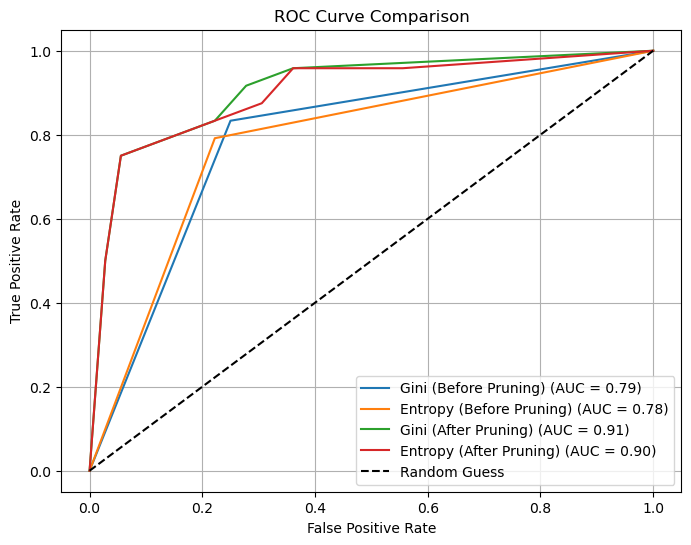

In [25]:
models = {
    "Gini (Before Pruning)": dt_gini,
    "Entropy (Before Pruning)": dt_entropy,
    "Gini (After Pruning)": gini_post_pruning["model"],
    "Entropy (After Pruning)": entropy_post_pruning["model"],
}

compare_roc_curves(models, X_test, y_test)

# 7. Feature Importance Visualization (Decision Tree)

In [26]:
def plot_feature_importance_grouped(models_dict, feature_names, sort_by_label, title):
    # sort features by importance of chosen model
    sort_model = models_dict.get(sort_by_label)
    if sort_model is None:
        raise ValueError(f"Model label '{sort_by_label}' not found in models_dict")
    
    importances_sort = sort_model.feature_importances_
    sorted_indices = np.argsort(importances_sort)[::-1]
    sorted_features = [feature_names[i] for i in sorted_indices]

    n_features = len(feature_names)
    x = np.arange(n_features)
    bar_width = 0.35
    colors = plt.cm.Set1.colors

    plt.figure(figsize=(10, 6))
    for i, (label, model) in enumerate(models_dict.items()):
        importances = model.feature_importances_[sorted_indices]
        plt.bar(x + i*bar_width - bar_width/2, importances, width=bar_width, 
                label=label, color=colors[i % len(colors)], alpha=0.8)
    
    plt.title(title)
    plt.xticks(x, sorted_features, rotation=45, ha='right')
    plt.ylabel("Feature Importance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

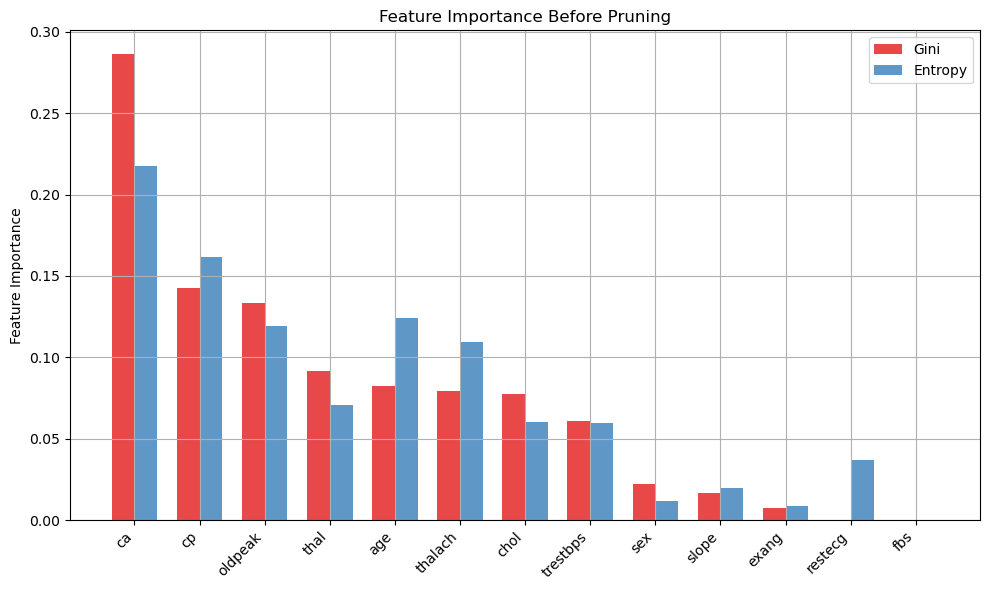

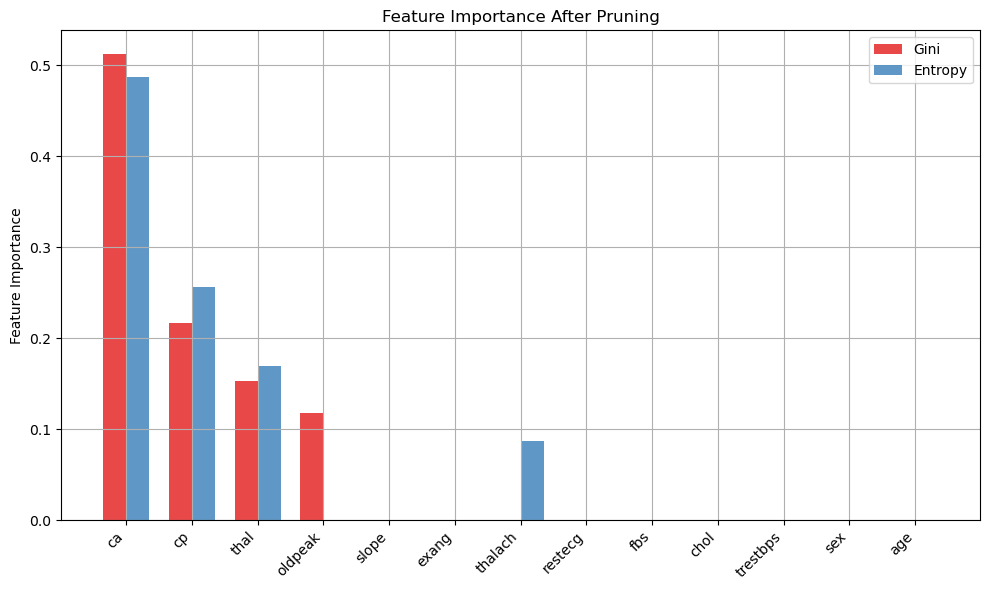

In [27]:
models_before = {
    "Gini": dt_gini,
    "Entropy": dt_entropy,
}

models_after = {
    "Gini": gini_post_pruning["model"],
    "Entropy": entropy_post_pruning["model"]
}

feature_names = X.columns.tolist()

plot_feature_importance_grouped(models_before, feature_names, sort_by_label="Gini", 
                               title="Feature Importance Before Pruning")

plot_feature_importance_grouped(models_after, feature_names, sort_by_label="Gini", 
                               title="Feature Importance After Pruning")
